In [118]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix,classification_report,roc_curve,accuracy_score,auc
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from keras.utils import np_utils
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Activation, Conv2D,MaxPooling2D, Flatten


In [119]:
df = pd.read_csv("datasets.csv")

In [120]:
df

,Number of times pregnant,Plasma glucose concentration,Diastolic blood pressure,Triceps skin fold thickness,2-Hour serum insulin,Body mass index,Diabetes pedigree function,Age (years),Class variable
0,6,148,72,35,0,33.6,0.627,50,YES
1,1,85,66,29,0,26.6,0.351,31,NO
2,8,183,64,0,0,23.3,0.672,32,YES
3,1,89,66,23,94,28.1,0.167,21,NO
4,0,137,40,35,168,43.1,2.288,33,YES
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,NO
764,2,122,70,27,0,36.8,0.340,27,NO
765,5,121,72,23,112,26.2,0.245,30,NO
766,1,126,60,0,0,30.1,0.349,47,YES


# Converting class variable to 1,0

In [121]:
title_mapping = {'YES':1,'NO':0}
df[' Class variable']=df[' Class variable'].map(title_mapping)

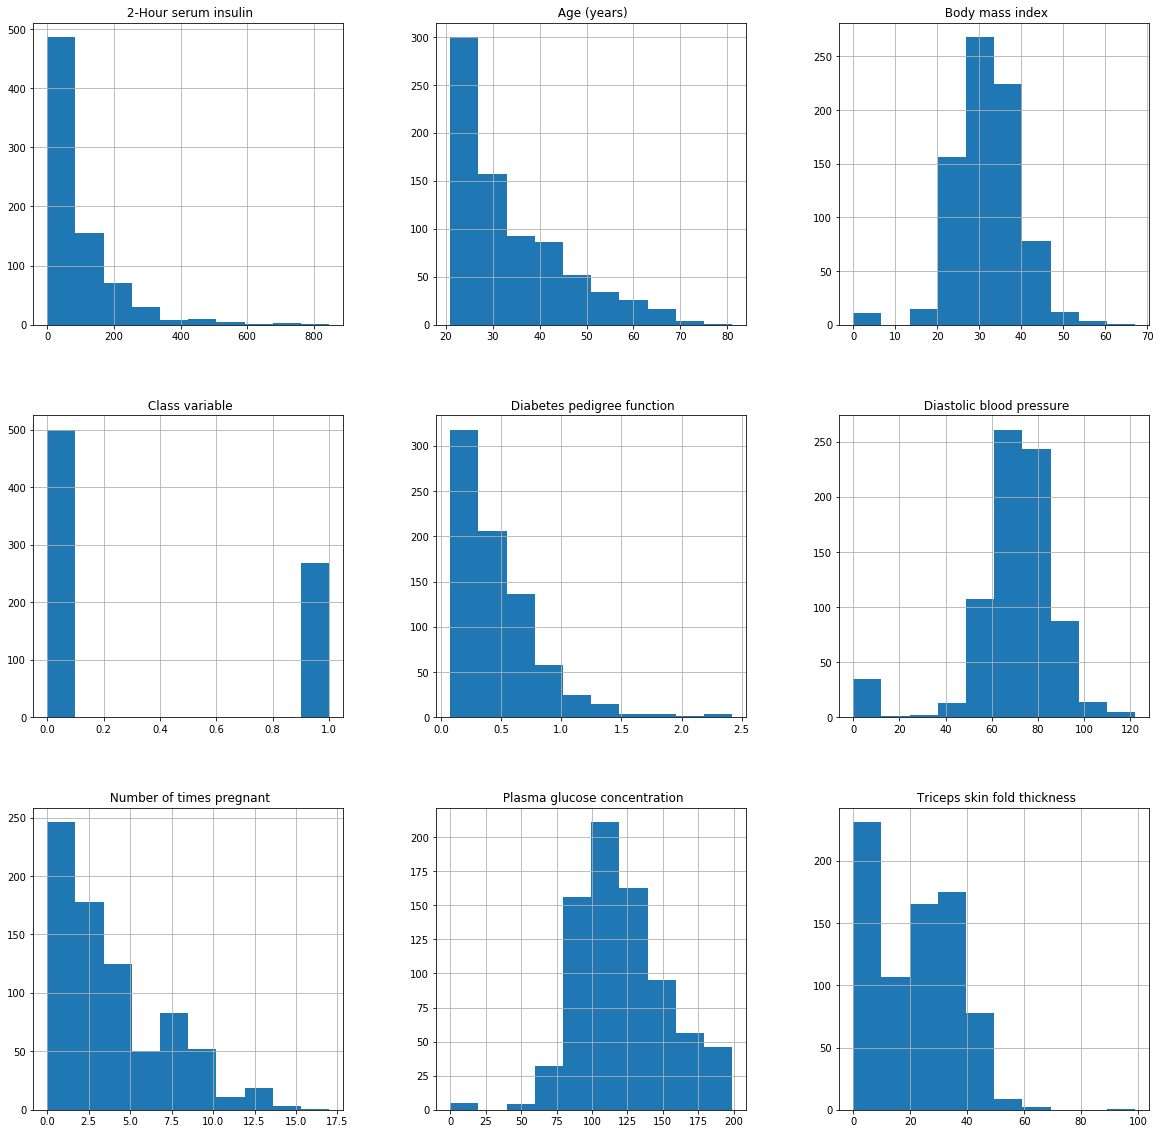

In [122]:
p = df.hist(figsize = (20,20))

Renaming the column

In [123]:
col=['no_pregnant','glucose_conc','bp','skin_len','insulin','bmi','pedigree_fun','age','Output']
df.columns=col
df.head()

,no_pregnant,glucose_conc,bp,skin_len,insulin,bmi,pedigree_fun,age,Output
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


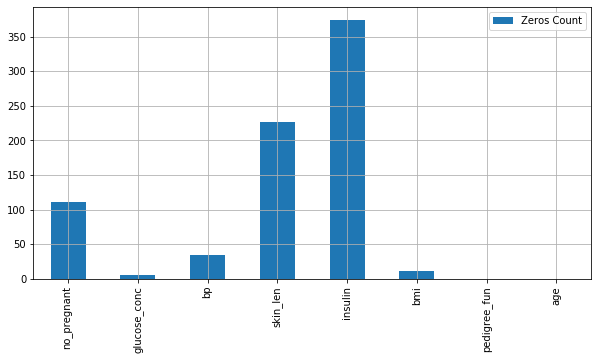

In [124]:
z=(df == 0).sum(axis=0)
z=pd.DataFrame(z)
z.columns=['Zeros Count']
z.drop('Output',inplace=True)
z.plot(kind='bar',stacked=True, figsize=(10,5),grid=True)

In [125]:
total = df.isnull().sum().sort_values(ascending = False)
percentage = (df.isnull().sum()/df.isnull().count()).sort_values(ascending = False)
missing_data = pd.concat([total,percentage],axis = 1, keys = ["Total","Percentage"])
missing_data

,Total,Percentage
Output,0,0.0
age,0,0.0
pedigree_fun,0,0.0
bmi,0,0.0
insulin,0,0.0
skin_len,0,0.0
bp,0,0.0
glucose_conc,0,0.0
no_pregnant,0,0.0


In [126]:
col=['glucose_conc','bp','insulin','bmi','skin_len']
for i in col:
    df[i].replace(0, np.nan, inplace= True)

In [127]:
df

,no_pregnant,glucose_conc,bp,skin_len,insulin,bmi,pedigree_fun,age,Output
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0
764,2,122.0,70.0,27.0,NaN,36.8,0.340,27,0
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0
766,1,126.0,60.0,NaN,NaN,30.1,0.349,47,1


In [128]:
df.isnull().sum()

no_pregnant       0
glucose_conc      5
bp               35
skin_len        227
insulin         374
bmi              11
pedigree_fun      0
age               0
Output            0
dtype: int64

In [58]:
df.shape

(768, 9)

# Plotting correaltion Graph

In [131]:
def plot_corr(df, size =5, colorMap= 'Blues'):
    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))  
    im = ax.imshow(corr, cmap = colorMap)
    
    plt.xticks(range(len(corr.columns)), corr.columns, rotation = 90)
    plt.yticks(range(len(corr.columns)), corr.columns) 
    #ax.set_title("Correlation Graph", fontdict = fontTitle)
    
    
    #divider = make_axes_locatable(ax)
   # cax = divider.append_axes('right', size='5%', pad=0.05)
    fig.colorbar(im,  orientation='vertical')
    plt.show()

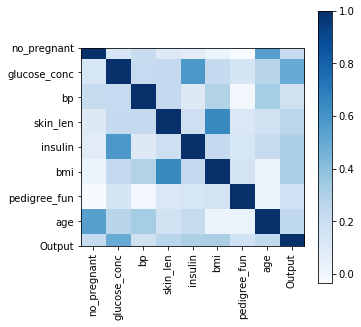

In [132]:
plot_corr(df)

# Calculation of median


In [143]:
def median(var):   
    temp = df[df[var].notnull()]
    temp = temp[[var, 'Output']].groupby(['Output'])[[var]].median().reset_index()
    return temp

In [144]:
median('insulin')

,Output,insulin
0,0,102.5
1,1,169.5


In [145]:
print(median('glucose_conc'))
print(median('skin_len'))
print(median('bp'))
print(median('bmi'))

   Output  glucose_conc
0       0         107.0
1       1         140.0
   Output  skin_len
0       0      27.0
1       1      32.0
   Output    bp
0       0  70.0
1       1  74.5
   Output   bmi
0       0  30.1
1       1  34.3


# Filling the NaN value with Median

In [146]:
df.loc[(df['Output'] == 0 ) & (df['insulin'].isnull()), 'insulin'] = 102.5
df.loc[(df['Output'] == 1 ) & (df['insulin'].isnull()), 'insulin'] = 169.5
df.loc[(df['Output'] == 0 ) & (df['glucose_conc'].isnull()), 'glucose_conc'] = 107
df.loc[(df['Output'] == 1 ) & (df['glucose_conc'].isnull()), 'glucose_conc'] = 140
df.loc[(df['Output'] == 0 ) & (df['skin_len'].isnull()), 'skin_len'] = 27
df.loc[(df['Output'] == 1 ) & (df['skin_len'].isnull()), 'skin_len'] = 32
df.loc[(df['Output'] == 0 ) & (df['bp'].isnull()), 'bp'] = 70
df.loc[(df['Output'] == 1 ) & (df['bp'].isnull()), 'bp'] = 74.5
df.loc[(df['Output'] == 0 ) & (df['bmi'].isnull()), 'bmi'] = 30.1
df.loc[(df['Output'] == 1 ) & (df['bmi'].isnull()), 'bmi'] = 34.3

In [147]:
df.isnull().sum()

no_pregnant     0
glucose_conc    0
bp              0
skin_len        0
insulin         0
bmi             0
pedigree_fun    0
age             0
Output          0
dtype: int64

In [148]:
df['no_pregnant'].value_counts()

1     135
0     111
2     103
3      75
4      72
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
Name: no_pregnant, dtype: int64

In [149]:
median('no_pregnant')

,Output,no_pregnant
0,0,2
1,1,4


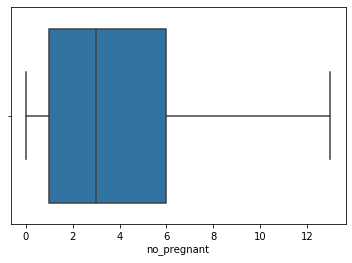

In [150]:
sns.boxplot(df.no_pregnant)

In [151]:
df.loc[(df['Output'] == 0 ) & (df['no_pregnant']>13), 'no_pregnant'] = 2
df.loc[(df['Output'] == 1 ) & (df['no_pregnant']>13), 'no_pregnant'] = 4

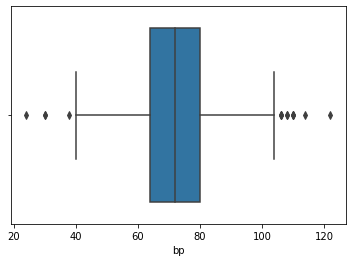

In [152]:
sns.boxplot(df.bp)

In [153]:
median('bp')

,Output,bp
0,0,70.0
1,1,74.5


In [154]:
df.loc[(df['Output'] == 0 ) & (df['bp']<40), 'bp'] = 70
df.loc[(df['Output'] == 1 ) & (df['bp']<40), 'bp'] = 74.5

In [155]:
df.loc[(df['Output'] == 0 ) & (df['bp']>103), 'bp'] = 70
df.loc[(df['Output'] == 1 ) & (df['bp']>103), 'bp'] = 74.5

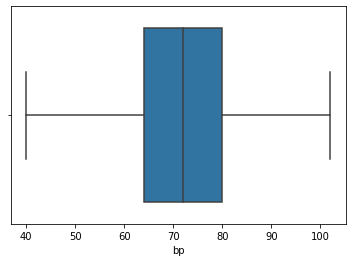

In [156]:
sns.boxplot(df.bp)

In [157]:
df.bp

0      72.0
1      66.0
2      64.0
3      66.0
4      40.0
       ... 
763    76.0
764    70.0
765    72.0
766    60.0
767    70.0
Name: bp, Length: 768, dtype: float64

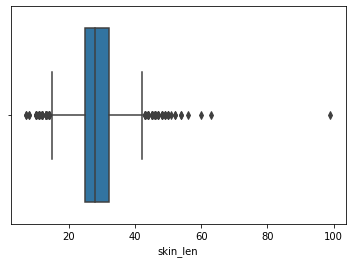

In [158]:
sns.boxplot(df.skin_len)

In [159]:
median('skin_len')

,Output,skin_len
0,0,27.0
1,1,32.0


In [160]:
df.skin_len

0      35.0
1      29.0
2      32.0
3      23.0
4      35.0
       ... 
763    48.0
764    27.0
765    23.0
766    32.0
767    31.0
Name: skin_len, Length: 768, dtype: float64

In [161]:
df.loc[(df['Output'] == 0 ) & (df['skin_len']>38), 'skin_len'] = 27
df.loc[(df['Output'] == 1 ) & (df['skin_len']>38), 'skin_len'] = 32

In [162]:
df.loc[(df['Output'] == 0 ) & (df['skin_len']<20), 'skin_len'] = 27
df.loc[(df['Output'] == 1 ) & (df['skin_len']<20), 'skin_len'] = 32

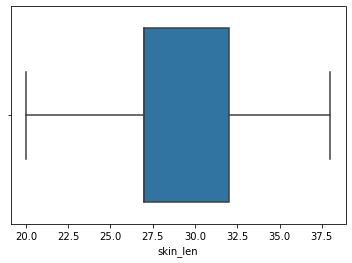

In [163]:
sns.boxplot(df.skin_len)

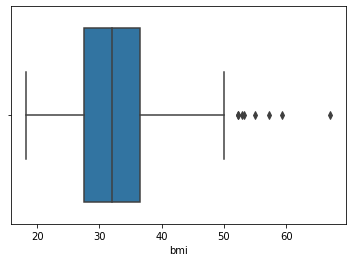

In [164]:
sns.boxplot(df.bmi)

In [165]:
df.loc[(df['Output'] == 0 ) & (df['bmi']>48), 'bmi'] = 30.1
df.loc[(df['Output'] == 1 ) & (df['bmi']>48), 'bmi'] = 34.3

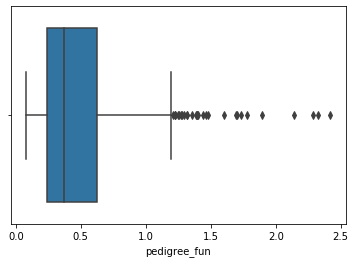

In [166]:
sns.boxplot(df.pedigree_fun)

In [167]:
df.loc[(df['Output'] == 0 ) & (df['pedigree_fun']>1), 'pedigree_fun'] = 0.336
df.loc[(df['Output'] == 1 ) & (df['pedigree_fun']>1), 'pedigree_fun'] = 0.449

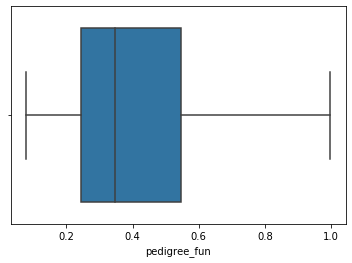

In [168]:
sns.boxplot(df.pedigree_fun)

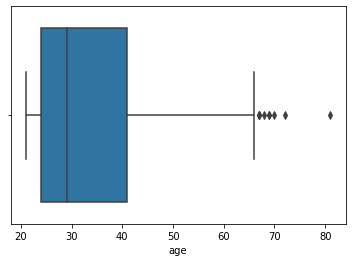

In [169]:
sns.boxplot(df.age)

In [170]:
df.loc[(df['Output'] == 0 ) & (df['age']>61), 'age'] = 27
df.loc[(df['Output'] == 1 ) & (df['age']>61), 'age'] = 36

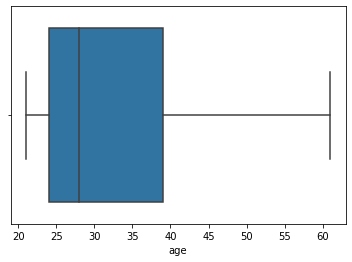

In [171]:
sns.boxplot(df.age)

# Splitting the datasets

In [172]:
X = df.drop(['Output'], 1)
y = df['Output']

In [173]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [174]:
std = StandardScaler()
x_train = std.fit_transform(x_train)
x_test = std.transform(x_test)

# SVM with kernel

In [175]:
model=SVC(kernel='rbf')
model.fit(x_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [176]:
y_pred=model.predict(x_test)

In [177]:
accuracy_score(y_test,y_pred)

0.9155844155844156

In [178]:
confusion_matrix(y_test,y_pred)

array([[99,  8],
       [ 5, 42]], dtype=int64)

In [179]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94       107
           1       0.84      0.89      0.87        47

    accuracy                           0.92       154
   macro avg       0.90      0.91      0.90       154
weighted avg       0.92      0.92      0.92       154



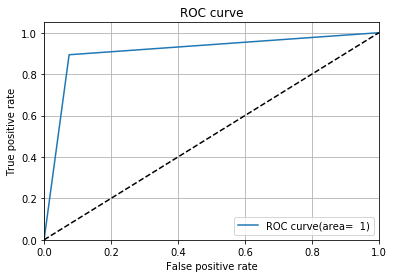

In [180]:
fpr,tpr,_=roc_curve(y_test,y_pred)
#calculate AUC
roc_auc=auc(fpr,tpr)

#plot of ROC curve for a specified class
plt.figure()
plt.plot(fpr,tpr,label='ROC curve(area= %2.f)' %roc_auc)
plt.plot([0,1],[0,1],'k--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()

# SVM with linear kernel


In [181]:
model=SVC(kernel='linear')
model.fit(x_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [182]:
y_pred=model.predict(x_test)

In [183]:
accuracy_score(y_test,y_pred)

0.8961038961038961

In [184]:
confusion_matrix(y_test,y_pred)

array([[96, 11],
       [ 5, 42]], dtype=int64)

In [185]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.90      0.92       107
           1       0.79      0.89      0.84        47

    accuracy                           0.90       154
   macro avg       0.87      0.90      0.88       154
weighted avg       0.90      0.90      0.90       154



ROC AUC: 0.90


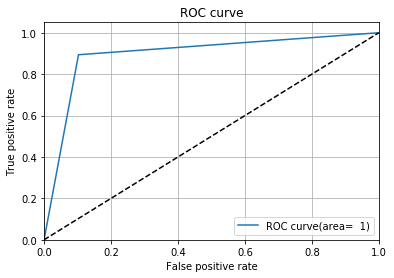

In [186]:
fpr,tpr,_=roc_curve(y_test,y_pred)
#calculate AUC
roc_auc=auc(fpr,tpr)
print('ROC AUC: %0.2f' % roc_auc)
#plot of ROC curve for a specified class
plt.figure()
plt.plot(fpr,tpr,label='ROC curve(area= %2.f)' %roc_auc)
plt.plot([0,1],[0,1],'k--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()

# KNN

In [187]:
clf = KNeighborsClassifier(n_neighbors=3) 
clf.fit(x_train,y_train)  
print(clf.score(x_test,y_test))

0.8961038961038961


In [188]:
y_pred=clf.predict(x_test)

In [189]:
accuracy_score(y_test,y_pred)

0.8961038961038961

In [190]:
confusion_matrix(y_test,y_pred)

array([[95, 12],
       [ 4, 43]], dtype=int64)

In [191]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.89      0.92       107
           1       0.78      0.91      0.84        47

    accuracy                           0.90       154
   macro avg       0.87      0.90      0.88       154
weighted avg       0.91      0.90      0.90       154



ROC AUC: 0.90


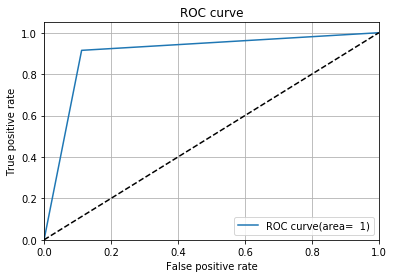

In [192]:
fpr,tpr,_=roc_curve(y_test,y_pred)
#calculate AUC
roc_auc=auc(fpr,tpr)
print('ROC AUC: %0.2f' % roc_auc)
#plot of ROC curve for a specified class
plt.figure()
plt.plot(fpr,tpr,label='ROC curve(area= %2.f)' %roc_auc)
plt.plot([0,1],[0,1],'k--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()

# Neural Network

In [193]:
model = Sequential()
model.add(Dense(32,input_shape=(x_train.shape[1],)))
model.add(Activation('relu'))
model.add(Dense(64,input_shape=(x_train.shape[1],)))
model.add(Activation('relu'))
model.add(Dense(64,input_shape=(x_train.shape[1],)))
model.add(Activation('relu'))
model.add(Dense(128,input_shape=(x_train.shape[1],)))
model.add(Activation('relu'))
model.add(Dense(128,input_shape=(x_train.shape[1],)))
model.add(Activation('relu'))
model.add(Dense(256,input_shape=(x_train.shape[1],)))
model.add(Activation('relu'))
model.add(Dense(256,input_shape=(x_train.shape[1],)))
model.add(Activation('relu'))
model.add(Dense(2))
model.add(Activation('softmax'))

In [194]:
print(model.summary())
model.compile(loss='sparse_categorical_crossentropy',
              optimizer="sgd",metrics=['accuracy'])
model.fit(x_train, y_train, batch_size=10, epochs=50, verbose=1, validation_data=(x_test, y_test))
loss, accuracy = model.evaluate(x_test,y_test, verbose=0)
print("Loss : "+str(loss))
print("Accuracy :"+str(accuracy*100.0))

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 32)                288       
_________________________________________________________________
activation_9 (Activation)    (None, 32)                0         
_________________________________________________________________
dense_10 (Dense)             (None, 64)                2112      
_________________________________________________________________
activation_10 (Activation)   (None, 64)                0         
_________________________________________________________________
dense_11 (Dense)             (None, 64)                4160      
_________________________________________________________________
activation_11 (Activation)   (None, 64)                0         
_________________________________________________________________
dense_12 (Dense)             (None, 128)              

Epoch 40/50
614/614 [==============================] - 0s 159us/step - loss: 0.1688 - accuracy: 0.9446 - val_loss: 0.3049 - val_accuracy: 0.8896
Epoch 41/50
614/614 [==============================] - 0s 167us/step - loss: 0.1629 - accuracy: 0.9446 - val_loss: 0.3968 - val_accuracy: 0.8636
Epoch 42/50
614/614 [==============================] - 0s 167us/step - loss: 0.1686 - accuracy: 0.9365 - val_loss: 0.3248 - val_accuracy: 0.8961
Epoch 43/50
614/614 [==============================] - 0s 167us/step - loss: 0.1437 - accuracy: 0.9495 - val_loss: 0.3358 - val_accuracy: 0.8896
Epoch 44/50
614/614 [==============================] - 0s 164us/step - loss: 0.1452 - accuracy: 0.9544 - val_loss: 0.3146 - val_accuracy: 0.8896
Epoch 45/50
614/614 [==============================] - 0s 155us/step - loss: 0.1492 - accuracy: 0.9463 - val_loss: 0.3168 - val_accuracy: 0.9091
Epoch 46/50
614/614 [==============================] - 0s 172us/step - loss: 0.1360 - accuracy: 0.9560 - val_loss: 0.4536 - val_ac